<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grover Search**

In [ ]:
!pip install cirq --quiet
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # %matplotlib inline
print(cirq.__version__)

###### **<font color="blue">Grover Search: Overview**

Grover’s algorithm solves oracles that **add a negative phase to the solution states**. I.e. for any state |x⟩ in the computational basis:

> $U_{\omega}|x\rangle=\left\{\begin{aligned}|x\rangle & \text { if } x \neq \omega \\-|x\rangle & \text { if } x=\omega \end{aligned}\right.$

We create a function $f$ that takes a proposed solution $x$, and returns 

* $f(x)=0$ if $x$ is not a solution ( $x \neq \omega)$ 

* $f(x)=1$ for a valid solution $(x=\omega)$.

The oracle can then be described as:

> $U_{\omega}|x\rangle=(-1)^{f(x)}|x\rangle$

* you can see this is an Eigenvalue equation



The oracle's matrix will be a diagonal matrix of the form:

> $U_{\omega}=\left[\begin{array}{cccc}(-1)^{f(0)} & 0 & \cdots & 0 \\ 0 & (-1)^{f(1)} & \cdots & 0 \\ \vdots & 0 & \ddots & \vdots \\ 0 & 0 & \cdots & (-1)^{f\left(2^{n}-1\right)}\end{array}\right]$

*Source: https://qiskit.org/textbook/ch-algorithms/grover.html*

> Grover's Algorithm uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states (=Phase Flip of Desired Outcome + Probability Amplitudes Inversion about the Mean to Amplify)

https://youtu.be/951pds5_5YM

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

* you can use binary search for sorted data

* but for unsorted, unstructured data, we need to use the 'linear search' alghorithm: browse through each single item

* Grover’s algorithm teaches us how we can search for an item in an unsorted list without needing to look at each item one by one but by looking at them all at once. It accomplishes that using two techniques. 
  
  * First, it uses a quantum oracle to mark the searched state. 
  
  * Second, it uses a diffuser that amplifies the amplitude of the marked state to increase its measurement probability.

* The measurement probability of a state depends on the amplitude of this particular state. Mathematically, the measurement probability is the squared absolute of the amplitude. 

* If we use four qubits, for example, then there are 2^4=16 different states. Starting from |0000⟩, to |0001⟩, ending at |1111⟩.

* Each qubit can have a specific meaning. We could interpret it as a letter. A letter that does not have 26 different options but only two, |0⟩ and |1⟩. **With a sufficient number of qubits, we could represent all living humans. With 33 qubits, we can represent around 8.5 billion different states**. A phonebook of mankind. And we haven’t sorted it.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_101.jpg)

###### **<font color="blue">Step 1: Hadamard-Operator for Superposition + Assign a Phase -1 to the desired outcome**

Start with a balanced superposition, and assign a phase of -1 to the chosen ket, 111). Assigning -1 means applying a Pauli-Z-operator in the superposition to this one !!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_102.jpg)

* Now, let’s say four qubits are enough and Mr. Grover is known as |0010⟩. The oracle uses the specific characteristic of this state to identifying it. That is the state has a |1⟩ at the third position and |0⟩ otherwise.

* Since the quantum oracle takes all qubits as input, it can easily apply a transformation of this exact state. It doesn’t matter whether we use four qubits or 33. The oracle identifies Mr. Grover in a single turn.

* The transformation the oracle applies to the searched state is an inversion of the amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_109.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_110.png)

* In the representation above representation (the dark one) of the amplitudes, we can clearly see a difference between the searched state and all the other states. We could prematurely declare the search is over.

* The only difference is in the sign of the amplitude. For the measurement probability results from the amplitude’ absolute square, the sign does not matter at all.

* The amplitude originates from the concept that every quantum entity may be described not only as a particle but also as a wave. The main characteristic of a wave is that it goes up and down as it moves. The amplitude is the distance between the center and the crest of the wave.

* If we invert the amplitude of a wave at all positions, the result is the same wave shifted by half of its wavelength.

* These two waves differ only in their relative position. This is the phase of the wave. For the outside world, the phase of a wave is not observable. Observed individually, the two waves appear identical. So, the problem is we can’t tell the difference between these two waves.

> As a consequence, the system does not appear any different from the outside. Even though the oracle marked the searched state and it, therefore, differs from the other states, all states still have the same measurement probability.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_111.png)

See here what that means:

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
ops=[cirq.H(a),
     cirq.H(b),
     cirq.Z(a), # adding a phase shift on qubit a, shifts from + to - (https://javafxpert.github.io/grok-bloch/)
     # no second hadamard added!, so we measure directly from the superposition state
     cirq.measure(a,b)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───M───
              │
b: ───H───────M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b=0111000111011011010100111000010011110101011010100010110001100101100100001101111100110111000111011101000001100111111000010111000111010011001100001010111011010101110011011000100010011101001111011100101101011011011111101101100010011000110110101110011000110111100000011110001010000111100100011110001000100011110010111001110111000001010100010101111110000000010100110000000011000100111000000111010000000100101101100100011001100011000011110010101110101101100111110100011111110111000101111100000100011011010110101001001110011011001110111010110011001110111010110001011111111110011010011001000010000111100101001111111101000011000001101110100110100111111000011010100111001100001001000110100111110101110111100100001101011011111101001101111100110001100111000011101101100100010101101111111001111101101101100011100010101000110100100101110001101011111001100010001100000101110000101001010100100011000101000011111011101010001110111011100000010001011000010010110110001010001010000111110110000101

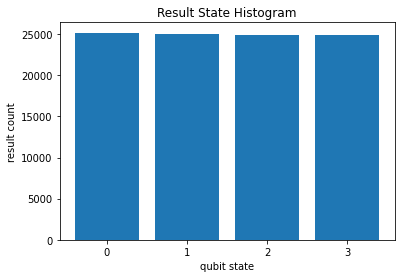

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

*As predicted, even though we shifted qubit a by a phase, the overall probabilities to measure a and b are still the same if we dont apply an amplifier (=a second H gate at the end)*

In [ ]:
result.histogram(key="a,b")

Counter({0: 25134, 1: 24844, 2: 25157, 3: 24865})

###### **<font color="blue">Step 2: Invert all probability amplitudes about the mean + Measure**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_103.jpg)

* We need to turn the difference into something measurable. We need to increase the measurement probability of the marked state. This is the task of the diffuser. The diffuser applies an inversion about the mean amplitude.

* Let’s have a look at the average amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_112.png)

* With four qubits, we have 16 different states. Each state has an amplitude of 1/sqrt(16)=1/4. In fact, each but one state — the searched state has this amplitude. The searched state has an amplitude of −1/4. Thus, the average is (15∗1/4−1/4)/16=0.21875.

* The average is a little less than the amplitude of all states we did not mark. If we invert these amplitudes by this mean, they end up a little lower than the average at 0.1875.

* For the amplitude of the marked state is negative, it is quite far away from the average. The inversion about the mean has a greater effect. It flips the amplitude from −0.25 by 2∗(0.25+0.21875) to 0.6875 (bzw: =0,21875-(-0,25-0,21875)).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_113.png)

* The inversion about the mean works well if we search for a single or a few negative amplitudes among many positive amplitudes. Then, this operation increases the negative amplitudes we know are the correct ones. And this operation decreases the positive amplitudes, we know are wrong.

> This operation increases the negative amplitude by a large amount while decreasing the positive amplitudes by a small amount.

* But the more states we have, the lower the overall effect will be. In our example, we calculated the new amplitude of the searched state as 0.6875. The corresponding measurement probability is 0.6875^2=0.47265625. Accordingly, we measure this system only about every other time in the state we are looking for. Otherwise, we measure it in any other case.

* Of course, we could now measure the system many times and see our searched state as the most probable one. But running the algorithm so many times would give away any advantage we gained from not searching all the states.

> **Instead, we repeat the algorithm. We use the same oracle to negate the amplitude of the searched state. Then we invert all the amplitudes around the mean, again**.

However, we must not repeat this process too many times. There is an optimal number of times of repeating this process to get the greatest chance of measuring the correct answer. 

* The probability of obtaining the correct result grows until we reach about π/4*sqrt(N) with N is the number of states of the quantum system. Beyond this number, the probability of measuring the correct result decreases again.

* In our example with four qubits and N=16 states, the optimum number of iterations is 3.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_104.jpg)

d is our matrix for the controlled Z operation (to highlight (11) as our desired result)

**<font color="blue">More about Amplitude Amplification**

* [Amplitude amplification](https://en.m.wikipedia.org/wiki/Amplitude_amplification) is a technique in quantum computing which **generalizes the idea behind the Grover's search algorithm**, and gives rise to a family of quantum algorithms.

* In a quantum computer, amplitude amplification can be used to **obtain a quadratic speedup over several classical algorithms**.

1. If there are $G$ good entries in the database in total, then we can find them by initializing a quantum register $|\psi\rangle$ with $n$ qubits where $2^{n}=N$ into a uniform superposition of all the database elements $N$ such that

>$| \psi \rangle=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}|k\rangle
$

2. and running the above algorithm. In this case the overlap of the initial state with the good subspace is equal to the square root of the frequency of the good entries in the database, $\sin (\theta)=|P| \psi\rangle \mid=\sqrt{G / N}$. If $\sin (\theta) \ll 1$, 

3. we can
approximate the number of required iterations as

>$
n=\left\lfloor\frac{\pi}{4 \theta}\right\rfloor \approx\left\lfloor\frac{\pi}{4 \sin (\theta)}\right\rfloor=\left\lfloor\frac{\pi}{4} \sqrt{\frac{N}{G}}\right\rfloor=O(\sqrt{N})
$

Measuring the state will now give one of the good entries with high probability.

Since each application of $S_{P}$ requires a single oracle query (assuming that the oracle is implemented as a quantum gate), we can find a good entry with just $O(\sqrt{N})$ oracle queries, thus obtaining a quadratic speedup over the best possible classical algorithm. (The classical method for searching the database would be to perform the query for every $e \in\{0,1, \ldots, N-1\}$ until a solution is found, thus costing $O(N)$ queries.) Moreover, we can find all $G$ solutions using $O(\sqrt{G N})$ queries.

###### **<font color="blue">Grover Search: Simple Examples (Z-Gate and I-Gate as amplifiers. with H as Diffuser)**

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

**Example 1: Z Gate to switch from 0 to 1**

* Let’s say the state |1⟩ depicts the favorable state we want to find. Then, the oracle consists of the Z-gate that switches the amplitude when the corresponding qubit is in state |1⟩.

* As a result, we see the amplitude changed for state |1⟩. The qubit is now in state |−⟩. Its two states |0⟩ and |1⟩ are in two different phases, now.

* In other words, we flipped the amplitude of state |1⟩ from positive to negative.

* Both states still have a measurement probability of 0.5. It is the task of the diffuser to magnify the amplitude to favor the searched state.

* **The diffuser in a single-qubit circuit is quite simple. It is another H-gate**. This circuit results in state |1⟩ with absolute certainty.



In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

In [ ]:
ops=[cirq.H(a),
     cirq.Z(a), # adding a phase shift on qubit a, shifts from + to - (https://javafxpert.github.io/grok-bloch/)
     cirq.H(a), # without the second H, there is still 50/50 probability, after H it changed to 1 with 100% probability
     cirq.measure(a)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a=0111101010100101010001110110110000001111100011010101110000001110001100000100011000011000111100111011


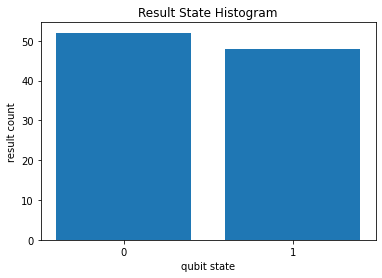

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

In [ ]:
result.histogram(key="a")

Counter({1: 100})

We applied an important sequence on the qubit, the HZH-circuit. This circuit is known as an identity to the NOT-gate (X-gate) that turns state |0⟩ into |1⟩ and vice versa.

The following equation proves this identity.

> $H Z H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]\left[\begin{array}{cc}1 & 0 \\ 0 & -1\end{array}\right] \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]=\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=X$

Then, why would we use the HZH-sequence? If it is similar to the NOT-gate, why don’t we use that instead?

Simply put, the HZH-sequence is more flexible. It is the simplest form of Grover’s search algorithm. It starts with all states being equal (the first H-gate). It applies an oracle (Z-gate). And, <font color="blue">**it uses a diffuser that amplifies the amplitude of the selected state |1⟩ (the second H-gate)**.

> While we could rewrite these two circuits more succinctly, the circuit identities of HZH=X and HIH=I let us use the general structure of Grover’s algorithm. Simply by changing the oracle, we can mark and amplify different states. We don’t need to come up with a new algorithm for each possible state we want to select out of a list. But we only need to find an appropriate oracle. This ability comes in handy the more states our quantum system has.

> The search for one of two possible states does not even deserve to be called a search. But the general structure of Grover’s algorithm is not different from this very simple example. **It uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states**.

**Example 2: I Gate to stay in 0**

To prove this flexibility, let’s say we wanted to select state |0⟩ instead. This is the task of the oracle. The starting state and the diffuser remain untouched. The oracle for state |0⟩ is the I-gate. Or, simply doing nothing.


In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

In [ ]:
ops=[cirq.H(a),
     cirq.I(a), # adding a identity gate
     cirq.H(a),
     cirq.measure(a)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───I───H───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


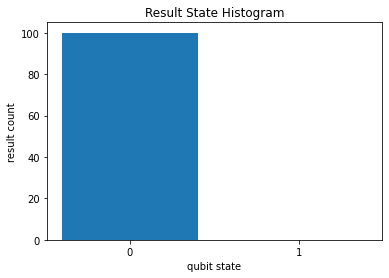

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

In [ ]:
result.histogram(key="a")

Counter({0: 100})

###### **<font color="blue">Grover Search: Cirq**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_105.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_106.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_107.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_108.jpg)

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

https://jonathan-hui.medium.com/qc-grovers-algorithm-cd81e61cf248

> **[Grover’s algorithm](https://en.m.wikipedia.org/wiki/Grover's_algorithm) teaches us how we can search for an item in an unsorted list without needing to look at each item one by one but by looking at them all at once.**

It accomplishes that using two techniques:

  * First, it uses a quantum oracle to mark the searched state. 
  
  * Second, it uses a diffuser that amplifies the amplitude of the marked state to increase its measurement probability.

Grover's Algorithm : Suche in grossen Datenbanken (Squared speedup: get result in the square root of time that on classical computers)

* Auf einem klassischen Computer ist der prinzipiell schnellstmögliche Suchalgorithmus in einer unsortierten Datenbank die [lineare Suche](https://de.m.wikipedia.org/wiki/Lineare_Suche), die ${\mathcal {O}}\left(N\right)$ Rechenschritte erfordert (Der Suchaufwand wächst linear mit der Anzahl der Elemente in der Liste.)

* Die effizientere [Binäre Suche](https://de.m.wikipedia.org/wiki/Binäre_Suche) kann nur bei geordneten Listen benutzt werden. Die Binäre Suche ist deutlich schneller als die lineare Suche, welche allerdings den Vorteil hat, auch in unsortierten Feldern zu funktionieren. In Spezialfällen kann die [Interpolationssuche](https://de.m.wikipedia.org/wiki/Interpolationssuche) schneller sein als die binäre Suche.

* Makes use of Amplitude Amplification, Quantum Walk & Quantum Counting

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/a-practical-guide-to-quantum-amplitude-amplification-dbcbe467044a

https://jonathan-hui.medium.com/qc-grovers-algorithm-cd81e61cf248

**So let’s build the 2 qubit grover search algorithm for 00** [Source](https://medium.com/@adubey40/grovers-algo-with-google-s-cirq-c7b359ce0d13)

In [ ]:
import cirq

q0, q1 = cirq.LineQubit.range(2)
# q0 = cirq.GridQubit(0, 0)
# q1 = cirq.GridQubit(0, 1)

grover = cirq.Circuit()
grover.append([cirq.H(q0), cirq.H(q1)])

# Oracle for |00⟩ :
grover.append([cirq.X(q0), cirq.X(q1)])
grover.append(cirq.CX(q0,q1))
grover.append([cirq.X(q0), cirq.X(q1)])

grover.append([cirq.H(q0), cirq.H(q1)])

# reflection circuit :
grover.append([cirq.Z(q0), cirq.Z(q1)])
grover.append(cirq.CX(q0,q1))

grover.append([cirq.H(q0), cirq.H(q1)])
grover.append([cirq.measure(q0), cirq.measure(q1)])

print(grover)

simulator = cirq.Simulator()
result = simulator.simulate(grover)
# result = simulator.run(circuit, repetitions=40) # NISQ computers
print(result)

0: ───H───X───@───X───H───Z───@───H───M───
              │               │
1: ───H───X───X───X───H───Z───X───H───M───
measurements: 0=0 1=1
output vector: |01⟩


**Cirq**

In [ ]:
"""Get qubits to use in the circuit for Grover's algorithm."""
# Number of qubits n.
nqubits = 2

# Get qubit registers.
qubits = cirq.LineQubit.range(nqubits)
ancilla = cirq.NamedQubit("Ancilla")

In [ ]:
def make_oracle(qubits, ancilla, xprime):
    """Implements the function {f(x) = 1 if x == x', f(x) = 0 if x != x'}."""
    # For x' = (1, 1), the oracle is just a Toffoli gate.
    # For a general x', we negate the zero bits and implement a Toffoli.

    # Negate zero bits, if necessary.
    yield (cirq.X(q) for (q, bit) in zip(qubits, xprime) if not bit)

    # Do the Toffoli.
    yield (cirq.TOFFOLI(qubits[0], qubits[1], ancilla))

    # Negate zero bits, if necessary.
    yield (cirq.X(q) for (q, bit) in zip(qubits, xprime) if not bit)

In [ ]:
def grover_iteration(qubits, ancilla, oracle):
    """Performs one round of the Grover iteration."""
    circuit = cirq.Circuit()

    # Create an equal superposition over input qubits.
    circuit.append(cirq.H.on_each(*qubits))

    # Put the output qubit in the |-⟩ state.
    circuit.append([cirq.X(ancilla), cirq.H(ancilla)])

    # Query the oracle.
    circuit.append(oracle)

    # Construct Grover operator.
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on(qubits[1]))
    circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    circuit.append(cirq.H.on(qubits[1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))

    # Measure the input register.
    circuit.append(cirq.measure(*qubits, key="result"))

    return circuit

In [ ]:
"""Select a 'marked' bitstring x' at random."""
xprime = [random.randint(0, 1) for _ in range(nqubits)]
print(f"Marked bitstring: {xprime}")

NameError: ignored

In [ ]:
"""Create the circuit for Grover's algorithm."""
# Make oracle (black box)
oracle = make_oracle(qubits, ancilla, xprime)

# Embed the oracle into a quantum circuit implementing Grover's algorithm.
circuit = grover_iteration(qubits, ancilla, oracle)
print("Circuit for Grover's algorithm:")
print(circuit)

NameError: ignored

In [ ]:
"""Simulate the circuit for Grover's algorithm and check the output."""
# Helper function.
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

# Sample from the circuit a couple times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)

# Look at the sampled bitstrings.
frequencies = result.histogram(key="result", fold_func=bitstring)
print('Sampled results:\n{}'.format(frequencies))

# Check if we actually found the secret value.
most_common_bitstring = frequencies.most_common(1)[0][0]
print("\nMost common bitstring: {}".format(most_common_bitstring))
print("Found a match? {}".format(most_common_bitstring == bitstring(xprime)))

###### **<font color="blue">Quantum Counting**

> **In quantum counting, we simply use the quantum phase estimation algorithm to find an eigenvalue of a Grover search iteration.**

* how many solutions exist?

* does there any solution exist?

The percentage number of solutions in our search space affects the difference between $|s\rangle$ and $\left|s^{\prime}\right\rangle$. For example, if there are not many solutions, $|s\rangle$ will be very close to $\left|s^{\prime}\right\rangle$ and $\theta$ will be very small. It turns out that the eigenvalues of the Grover iterator are $e^{\pm i \theta}$, and **we can extract this using quantum phase estimation (QPE) to estimate the number of solutions $(M)$**.


**First we want to get $\theta$ from measured_int. (phase estimation)** 

* You will remember that $\mathrm{QPE}$ gives us a measured value $=2^{n} \phi$ from the eigenvalue $e^{2 \pi i \phi}$, 

* so to get $\theta$ we need to do:

> $
\theta=\text { value } \times \frac{2 \pi}{2^{t}}
$

**Second, we calculate the inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle:$**

> $
\left\langle s^{\prime} \mid s\right\rangle=\cos \frac{\theta}{2}
$

* And that $|s\rangle$ (a uniform superposition of computational basis states) can be written in terms of $|\omega\rangle$ and $\left|s^{\prime}\right\rangle$ as:

> $
|s\rangle=\sqrt{\frac{M}{N}}|\omega\rangle+\sqrt{\frac{N-M}{N}}\left|s^{\prime}\right\rangle
$

* The inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle$ is:

> $
\left\langle s^{\prime} \mid s\right\rangle=\sqrt{\frac{N-M}{N}}=\cos \frac{\theta}{2}$

* From this, we can use some trigonometry and algebra to show:

> $
N \sin ^{2} \frac{\theta}{2}=M
$

**Third, calculate number of solutions**

* From the Grover's algorithm chapter, you will remember that a common way to create a diffusion operator, $U_{s}$, is actually to implement $-U_{s}$. 

* This implementation is used in the Grover iteration provided in this chapter. In a normal Grover search, this phase is global and can be ignored, but now we are controlling our Grover iterations, this phase does have an effect. 

* The result is that we have effectively searched for the states that are not solutions, and our quantum counting algorithm will tell us how mâny states are not solutions. To fix this, we simply calculate 

> $N-M$

https://qiskit.org/textbook/ch-algorithms/quantum-counting.html

* [Quantum counting algorithm](https://en.m.wikipedia.org/wiki/Quantum_counting_algorithm) is a quantum algorithm for efficiently counting the number of solutions for a given search problem. The algorithm is based on the quantum phase estimation algorithm and on Grover's search algorithm.

* Counting problems are common in diverse fields such as statistical estimation, statistical physics, networking, etc. As for quantum computing, the ability to perform quantum counting efficiently is needed in order to use Grover's search algorithm (because running Grover's search algorithm requires knowing how many solutions exist). Moreover, this algorithm solves the quantum existence problem (namely, deciding whether any solution exists) as a special case.

* The algorithm was devised by Gilles Brassard, Peter Høyer and Alain Tapp in 1998.